In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fetch Microsoft (MSFT) stock data
dat = yf.Ticker("MSFT")
msft_data = dat.history(period="5y")["Close"]

# Fetch market data (e.g., S&P 500 as the market index)
market = yf.Ticker("^GSPC")  # S&P 500 Index
market_data = market.history(period="5y")["Close"]


In [4]:
msft_data

Date
2020-01-03 00:00:00-05:00    152.021393
2020-01-06 00:00:00-05:00    152.414368
2020-01-07 00:00:00-05:00    151.024673
2020-01-08 00:00:00-05:00    153.430283
2020-01-09 00:00:00-05:00    155.347046
                                ...    
2024-12-26 00:00:00-05:00    438.109985
2024-12-27 00:00:00-05:00    430.529999
2024-12-30 00:00:00-05:00    424.829987
2024-12-31 00:00:00-05:00    421.500000
2025-01-02 00:00:00-05:00    418.579987
Name: Close, Length: 1258, dtype: float64

In [5]:
# Calculate daily returns
msft_returns = msft_data.pct_change().dropna()
market_returns = market_data.pct_change().dropna()

In [6]:
market_returns

Date
2020-01-06 00:00:00-05:00    0.003533
2020-01-07 00:00:00-05:00   -0.002803
2020-01-08 00:00:00-05:00    0.004902
2020-01-09 00:00:00-05:00    0.006655
2020-01-10 00:00:00-05:00   -0.002855
                               ...   
2024-12-26 00:00:00-05:00   -0.000406
2024-12-27 00:00:00-05:00   -0.011056
2024-12-30 00:00:00-05:00   -0.010702
2024-12-31 00:00:00-05:00   -0.004285
2025-01-02 00:00:00-05:00   -0.002224
Name: Close, Length: 1257, dtype: float64

Beta (slope): 1.173961107268059
Alpha (intercept): 0.0003276771708546106
R-squared: 0.6747819403540009


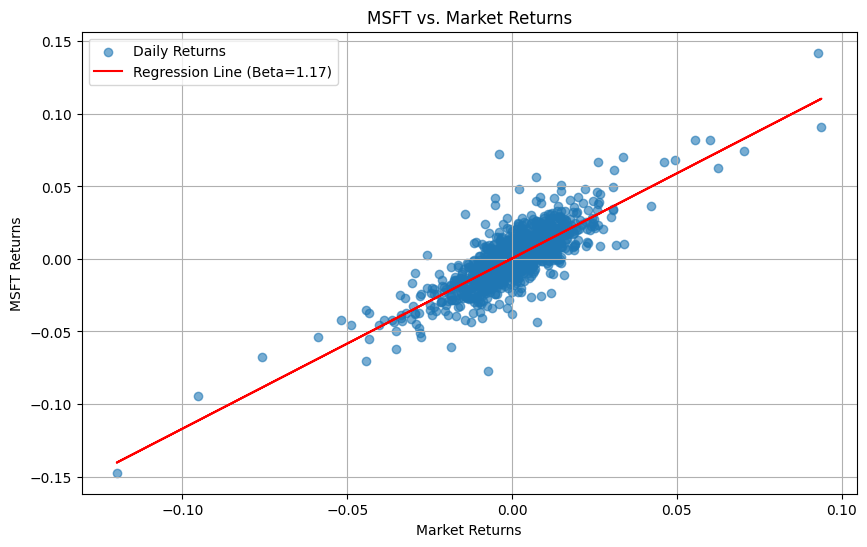

Expected Return of MSFT using CAPM: 8.87%


In [7]:
# Align data to ensure the same time period
returns = pd.DataFrame({"MSFT": msft_returns, "Market": market_returns}).dropna()

# Perform linear regression to estimate beta
slope, intercept, r_value, p_value, std_err = linregress(returns["Market"], returns["MSFT"])

# Print results
print(f"Beta (slope): {slope}")
print(f"Alpha (intercept): {intercept}")
print(f"R-squared: {r_value ** 2}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(returns["Market"], returns["MSFT"], alpha=0.6, label="Daily Returns")
plt.plot(returns["Market"], intercept + slope * returns["Market"], color="red", label=f"Regression Line (Beta={slope:.2f})")
plt.title("MSFT vs. Market Returns")
plt.xlabel("Market Returns")
plt.ylabel("MSFT Returns")
plt.legend()
plt.grid(True)
plt.show()

# CAPM Calculation
risk_free_rate = 0.03  # Example: 3% annualized risk-free rate
expected_market_return = 0.08  # Example: 8% annualized market return

expected_return = risk_free_rate + slope * (expected_market_return - risk_free_rate)
print(f"Expected Return of MSFT using CAPM: {expected_return:.2%}")
